# Let this N=500 simulation run for ~17h

In [96]:
using Test
using StaticArrays
using Random
using Plots
import Pkg
using Statistics

Pkg.activate(joinpath(@__DIR__, "../../../"))
using segc_wl   # or the module name inside segc_wl.jl


  Activating project at `~/Documents/montecarlo/segc_wl`


In [97]:
# input_path = joinpath(@__DIR__, "wl_checkpoin.jdl2")

wl = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/test/lambda_max_opt/N500_M10/wl_checkpoint.jld2")

WangLandauVars(1.0, [68635237477 2803916 … 15 5; 68635237489 2803957 … 31 37; … ; 68635237508 2803968 … 3 0; 68635237520 2803976 … 25 0], [6.8635237477e10 2.803916e6 … 15.0 5.0; 6.8635237489e10 2.803957e6 … 31.0 37.0; … ; 6.8635237508e10 2.803968e6 … 3.0 0.0; 6.863523752e10 2.803976e6 … 25.0 0.0], 515628023594, 515136964199, 171875926406, 90996181464, 687503950000, 4.4e-323)

In [98]:
wl.logf


1.0

In [99]:
println(minimum(wl.H_λN)) # hasnt even visited all states
println(maximum(wl.H_λN)) 


0
68635237520


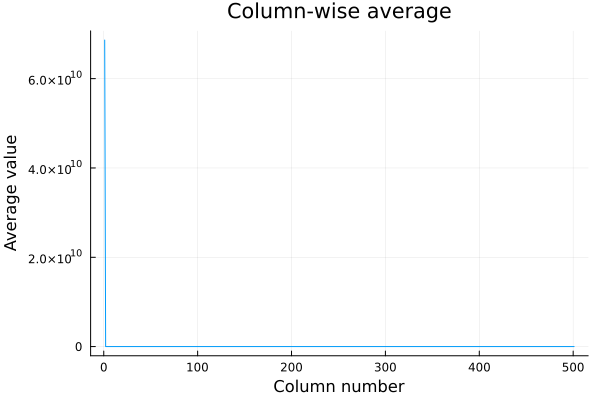

In [100]:


# Example array (remove this if you already have A)
# A = rand(10, 501)
A = wl.H_λN
# -------------------------
# 1. Average of columns vs column index
# -------------------------
col_avg = mean(A, dims=1)[:]      # size: 501
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    title = "Column-wise average",
    legend = false
)

# -------------------------
# 2. Average of rows vs row index
# -------------------------
row_avg = mean(A, dims=2)[:]      # size: 10
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    title = "Row-wise average",
    legend = false
)

# -------------------------
# 3. 3D plot: row, column → value
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

# -------------------------
# Display all three
# -------------------------
plot(p1)



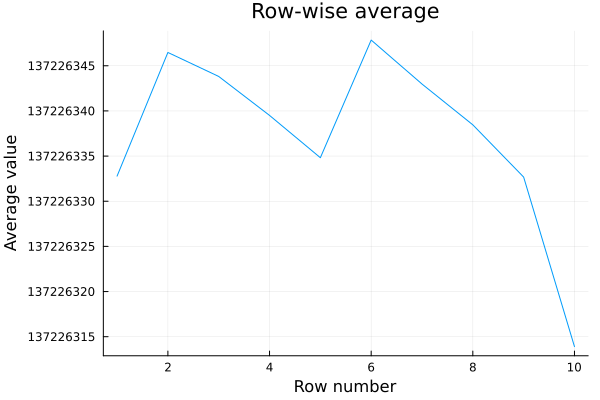

In [101]:
plot(p2)


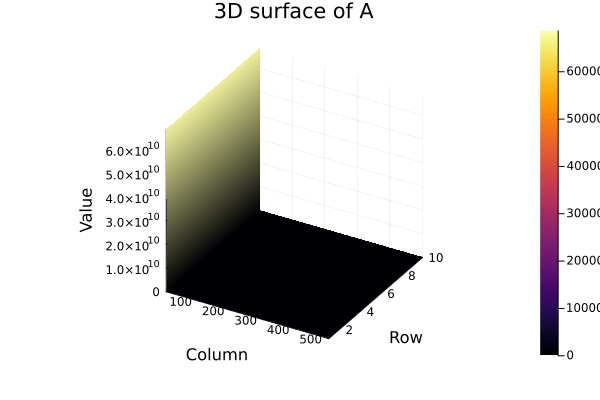

In [102]:
plot(p3)

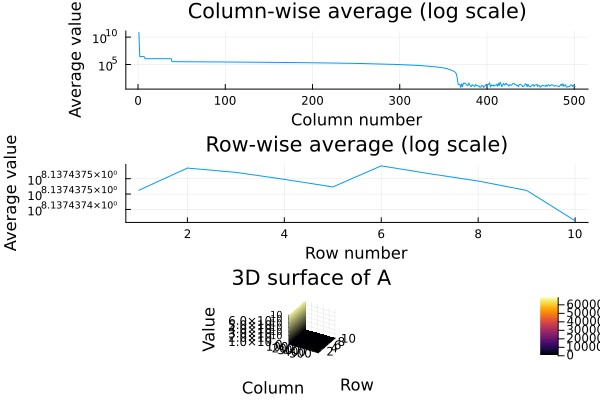

In [103]:
using Statistics
using Plots

# -------------------------
# Column averages (log y)
# -------------------------
col_avg = mean(A, dims=1)[:]
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Column-wise average (log scale)",
    legend = false
)

# -------------------------
# Row averages (log y)
# -------------------------
row_avg = mean(A, dims=2)[:]
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Row-wise average (log scale)",
    legend = false
)

# -------------------------
# 3D surface (linear)
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

plot(p1, p2, p3, layout = (3, 1))


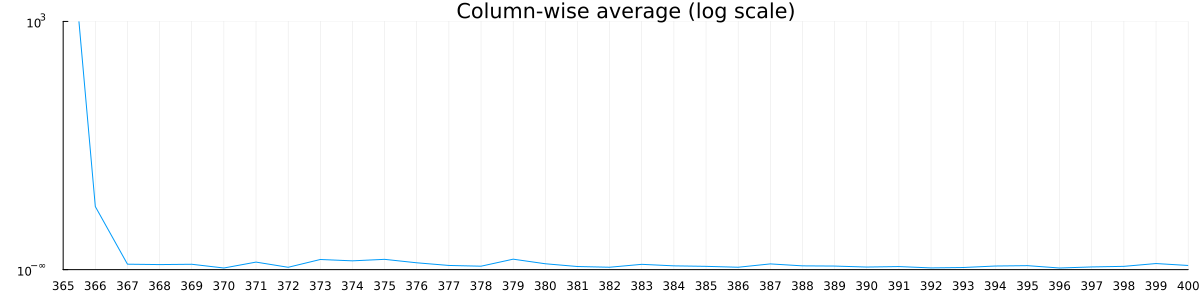

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194


In [107]:
p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    ylims = (0,1000),
    xlims = (365,400),
    title = "Column-wise average (log scale)",
    legend = false, 
    xticks = 360:1:400,
    size = (1200, 300)
)
plot(p1)

# Well so with shorter run time, we see the same trend even with λ = 100, I guess we would see sampling line slowly move over towards high N as num samples increased 